<a href="https://colab.research.google.com/github/RidhimaS123/Breast-Cancer-Classification/blob/main/Breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)


In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#adding the target column
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
data_frame.shape

(569, 31)

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Data pre-proccessing


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 1. Handling Outliers
# We'll use the Interquartile Range (IQR) method to cap outliers for radius_mean and area_mean

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping for radius_mean and area_mean
cap_outliers(data_frame, 'mean radius')
cap_outliers(data_frame, 'mean area')

# 2. Handling Missing Values
# Using SimpleImputer to fill missing values in texture_mean and smoothness_mean with the mean of each column

imputer = SimpleImputer(strategy='mean')
data_frame[['mean texture', 'mean smoothness']] = imputer.fit_transform(data_frame[['mean texture', 'mean smoothness']])

# 3. Scaling Data
# Standardize numerical columns (mean=0, std=1)
scaler = StandardScaler()
numerical_cols = data_frame.select_dtypes(include=[np.number]).columns  # Select numerical columns
data_frame[numerical_cols] = scaler.fit_transform(data_frame[numerical_cols])

print(data_frame.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.176800     -2.073335        1.269934   1.184085         1.568466   
1     1.949929     -0.353632        1.685955   2.249396        -0.826962   
2     1.686226      0.456187        1.566503   1.846217         0.942210   
3    -0.791983      0.253732       -0.592687  -0.831485         3.283553   
4     1.866023     -1.151816        1.776573   2.154338         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
# checking for missing values
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
#statistical measures about data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,2.622390e-16,6.868164e-17,-1.248757e-16,7.492542e-17,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16,-4.995028e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.122184e+00,-2.229249e+00,-1.984504e+00,-1.626699e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,-1.297676e+00
25%,-7.080771e-01,-7.259631e-01,-6.919555e-01,-7.193810e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,-1.297676e+00
50%,-2.076408e-01,-1.046362e-01,-2.359800e-01,-2.906340e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,7.706085e-01
75%,5.145457e-01,5.841756e-01,4.996769e-01,4.685234e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,7.706085e-01
max,2.348480e+00,4.651889e+00,3.976130e+00,2.250380e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,7.706085e-01


In [ ]:
# 0 represents malignant and 1 represents benign
data_frame['label'].value_counts()

,count
label,
0.770609,357
-1.297676,212


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
-1.297676,0.967050,0.538776,0.963700,0.976872,0.465295,0.774107,0.903649,1.007793,0.428880,-0.016659,...,1.007585,0.592912,1.015969,0.952267,0.546925,0.766924,0.855960,1.029791,0.540215,0.420281
0.770609,-0.574271,-0.319945,-0.572281,-0.580103,-0.276309,-0.459694,-0.536621,-0.598465,-0.254685,0.009893,...,-0.598342,-0.352093,-0.603320,-0.565492,-0.324784,-0.455428,-0.508301,-0.611529,-0.320800,-0.249579


Seperating the features and target

In [ ]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.176800     -2.073335        1.269934   1.184085         1.568466   
1       1.949929     -0.353632        1.685955   2.249396        -0.826962   
2       1.686226      0.456187        1.566503   1.846217         0.942210   
3      -0.791983      0.253732       -0.592687  -0.831485         3.283553   
4       1.866023     -1.151816        1.776573   2.154338         0.280372   
..           ...           ...             ...        ...              ...   
564     2.246595      0.721473        2.060786   2.250380         1.041842   
565     1.818077      2.085134        1.615931   2.036334         0.102458   
566     0.760269      2.045574        0.672676   0.715676        -0.840484   
567     1.958919      2.336457        1.982524   2.049446         1.525767   
568    -1.888747      1.221792       -1.814389  -1.503778        -3.112085   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0     -1.297676
1     -1.297676
2     -1.297676
3     -1.297676
4     -1.297676
         ...   
564   -1.297676
565   -1.297676
566   -1.297676
567   -1.297676
568    0.770609
Name: label, Length: 569, dtype: float64


Splitting the data into training data and Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
# 0.2 ka mtlb inn 569 rows m se 20% test data hoga and 80% training data
# random state mtlb hm jb bhi iss data ko split krenge toh ye hrr baar alg treeke sse split hoga lekin age hm random_state ki kuch value de denge toh ye hrr baar 1 hi treeke se split hoga


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Model training: we will use logitic regression as logisitc regression is very useful for binary classification

Accuracy score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

# Convert Y_train and Y_test to binary if needed
Y_train_binary = np.where(Y_train > 0.5, 1, 0)
Y_test_binary = np.where(Y_test > 0.5, 1, 0)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, Y_train_binary)

# Make predictions on the training data
X_train_prediction = model.predict(X_train)

# Make predictions on the testing data
X_test_prediction = model.predict(X_test)

# Calculate metrics on training data
training_data_accuracy = accuracy_score(Y_train_binary, X_train_prediction)
training_data_precision = precision_score(Y_train_binary, X_train_prediction)
training_data_recall = recall_score(Y_train_binary, X_train_prediction)

# Calculate metrics on testing data
testing_data_accuracy = accuracy_score(Y_test_binary, X_test_prediction)
testing_data_precision = precision_score(Y_test_binary, X_test_prediction)
testing_data_recall = recall_score(Y_test_binary, X_test_prediction)

# Display results
print("Training Data Metrics:")
print("Accuracy:", training_data_accuracy)
print("Precision:", training_data_precision)
print("Recall:", training_data_recall)

print("\nTesting Data Metrics:")
print("Accuracy:", testing_data_accuracy)
print("Precision:", testing_data_precision)
print("Recall:", testing_data_recall)

Training Data Metrics:
Accuracy: 0.989010989010989
Precision: 0.9862542955326461
Recall: 0.9965277777777778

Testing Data Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9852941176470589
Recall: 0.9710144927536232


Building a predictive system

In [ ]:
input_data = (18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742,0.4467,0.7732,3.18,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.2,1606,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368)

#change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape teh array
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print('The breast cancer is Malignant')

else:
  print('The breast cancer is Benign')

[0]
The breast cancer is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Binning for random forest classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=2)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train_binary)

# Predict on the training data
Y_train_prediction = rf_classifier.predict(X_train)

# Predict on the testing data
Y_test_prediction = rf_classifier.predict(X_test)

# Calculate probabilities for precision-recall and ROC curves
Y_test_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Metrics for training data
train_accuracy = accuracy_score(Y_train_binary, Y_train_prediction)
train_precision = precision_score(Y_train_binary, Y_train_prediction)
train_recall = recall_score(Y_train_binary, Y_train_prediction)

# Metrics for testing data
test_accuracy = accuracy_score(Y_test_binary, Y_test_prediction)
test_precision = precision_score(Y_test_binary, Y_test_prediction)
test_recall = recall_score(Y_test_binary, Y_test_prediction)

# Display metrics
print("Training Data Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)


Training Data Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Testing Data Metrics:
Accuracy: 0.9473684210526315
Precision: 0.9701492537313433
Recall: 0.9420289855072463


KNN class

In [ ]:
import numpy as np

# Convert `Y_test` to binary values if needed (for binary classification)
Y_test = np.where(Y_test > 0.5, 1, 0)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Convert `Y_train` and `Y_test` to binary values if needed (for binary classification)
Y_train_binary = np.where(Y_train > 0.5, 1, 0)
Y_test_binary = np.where(Y_test > 0.5, 1, 0)

# Initialize the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train, Y_train_binary)

# Predict on the training data
Y_train_prediction = knn_model.predict(X_train)

# Predict on the testing data
Y_test_prediction = knn_model.predict(X_test)

# Metrics for training data
train_accuracy = accuracy_score(Y_train_binary, Y_train_prediction)
train_precision = precision_score(Y_train_binary, Y_train_prediction)
train_recall = recall_score(Y_train_binary, Y_train_prediction)

# Metrics for testing data
test_accuracy = accuracy_score(Y_test_binary, Y_test_prediction)
test_precision = precision_score(Y_test_binary, Y_test_prediction)
test_recall = recall_score(Y_test_binary, Y_test_prediction)

# Display metrics for training data
print("Training Data Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)

# Display metrics for testing data
print("\nTesting Data Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)


Training Data Metrics:
Accuracy: 0.9758241758241758
Precision: 0.9663299663299664
Recall: 0.9965277777777778

Testing Data Metrics:
Accuracy: 0.9736842105263158
Precision: 0.9583333333333334
Recall: 1.0


Training the models


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train_binary)  # Train Logistic Regression

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train_binary)  # Train KNN

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(X_train, Y_train_binary)  # Train Random Forest Classifier

# Create the models dictionary AFTER fitting
models = {
    'Logistic Regression': logistic_model,
    'KNN': knn_model,
    'Random Forest Classifier': rf_classifier
}


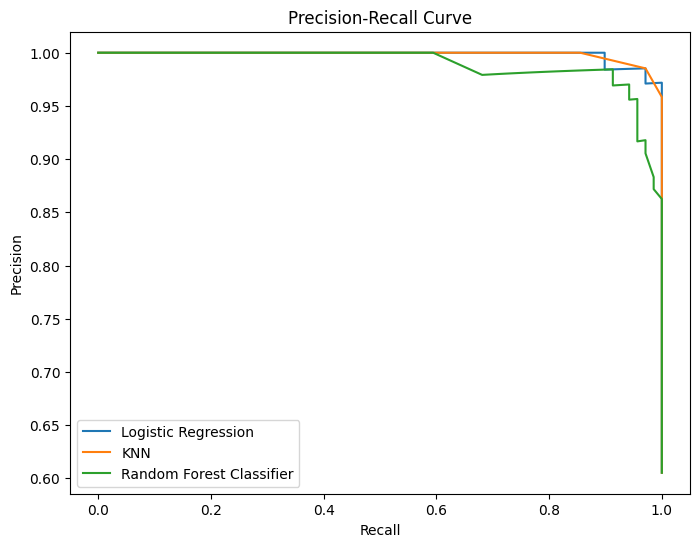

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for name, model in models.items():
    if name == 'Random Forest Regressor':
        y_scores = model.predict(X_test)  # Continuous predictions
    else:
        y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for binary classification

    precision, recall, _ = precision_recall_curve(Y_test_binary, y_scores)
    plt.plot(recall, precision, label=name)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


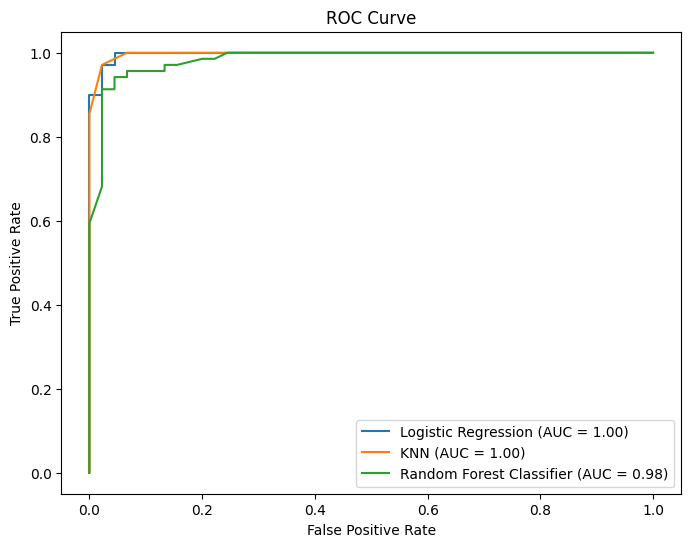

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_scores = model.predict_proba(X_test)[:, 1]  # Probabilities for binary classification
    fpr, tpr, _ = roc_curve(Y_test_binary, y_scores)
    auc = roc_auc_score(Y_test_binary, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


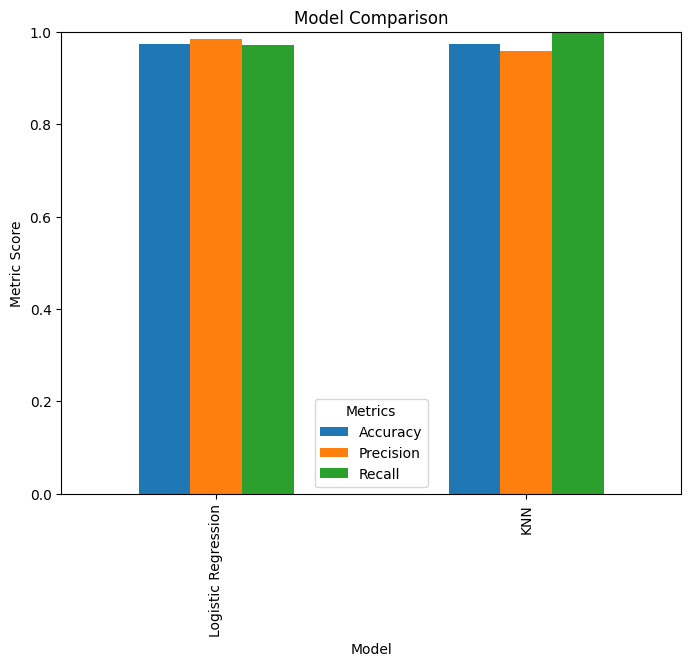

In [ ]:
metrics = {
    'Logistic Regression': {'Accuracy': testing_data_accuracy, 'Precision': testing_data_precision, 'Recall': testing_data_recall},
    'KNN': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall}
}

metric_df = pd.DataFrame(metrics).T
metric_df.plot(kind='bar', figsize=(8, 6))
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Score')
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.show()


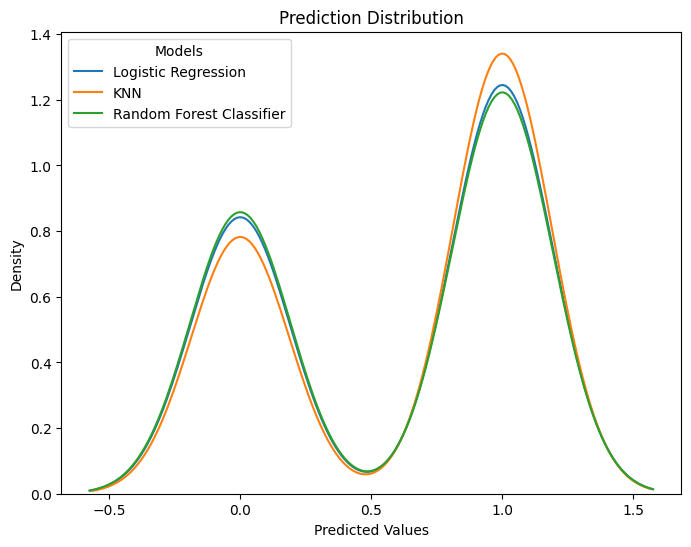

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming models are already trained and ready to predict
models = {
    'Logistic Regression': logistic_model,
    'KNN': knn_model,
    'Random Forest Classifier': rf_classifier  # Add Random Forest model here
}

plt.figure(figsize=(8, 6))

# Plot predictions for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    sns.kdeplot(y_pred, label=name)

# Customize the plot
plt.title('Prediction Distribution')
plt.xlabel('Predicted Values')
plt.legend(title='Models')
plt.show()
